<a href="https://colab.research.google.com/github/RennamFariaUNIFESP/Titanic_Decision_Tree/blob/main/%C3%81rvores_de_Decis%C3%A3o_RennamFaria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [284]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [285]:
import sys
import os

In [286]:
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

if 'google.colab' in sys.modules:
  !pip install -q dtreeviz

In [287]:
import numpy as np

# data processing
import pandas as pd
import dtreeviz

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier


In [288]:
from zipfile import ZipFile
zip_file = ZipFile('/content/drive/MyDrive/IA/Data/titanic.zip')

data_train = pd.read_csv(zip_file.open('train.csv'))
data_test = pd.read_csv(zip_file.open('test.csv'))
data_gender = pd.read_csv(zip_file.open('gender_submission.csv'))

In [289]:
data_train.head()   ##

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [290]:
data_train.info()   ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [291]:
alldata = [data_train, data_test]

In [292]:
data_train.describe()   ##

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [293]:
data_train.columns.values   ##

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [294]:
data_train['Embarked'].describe()   ##

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [295]:
data_train['Embarked'].value_counts()   ##

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [296]:
data_train['Embarked'].isna().sum()   ##

2

In [297]:
for dataset in alldata:
    dataset.dropna(subset=['Embarked'], inplace=True)    #removendo
    dataset.reset_index(drop=True, inplace=True)

In [298]:
data_train['Embarked'].isna().sum()   ##

0

In [299]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [300]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [301]:
for dataset in alldata:
    dataset['Ticket'] = dataset.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == 'LINE' else x[:][-1])
    dataset['Ticket'] = dataset['Ticket'].astype(int)

In [302]:
data_train.head()   ##

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [303]:
data_train = data_train.drop(['PassengerId','Name','Cabin','Fare'], axis=1)
data_test = data_test.drop(['PassengerId','Name','Cabin','Fare'], axis=1)

#the code is removing this coluns, maybe i can use these to something

In [304]:
data_train.head()   ##

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,0,22.0,1,0,21171,0
1,1,1,1,38.0,1,0,17599,1
2,1,3,1,26.0,0,0,3101282,0
3,1,1,1,35.0,1,0,113803,0
4,0,3,0,35.0,0,0,373450,0


In [305]:
data_test.head()    ##

,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,3,0,34.5,0,0,330911,2
1,3,1,47.0,1,0,363272,0
2,2,0,62.0,0,0,240276,2
3,3,0,27.0,0,0,315154,0
4,3,1,22.0,1,1,3101298,0


In [306]:
data_gender.head()    ##

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [307]:
data_gender.info()    ##

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [308]:
!pip install sweetviz

In [309]:
data_train['Age'].isna().sum()    ##

177

In [310]:
data_train['Age'] = data_train['Age'].interpolate(method='linear', limit_direction='forward', axis=0)
data_train['Age'] = data_train['Age'].astype(int)

In [311]:
data_test['Age'] = data_test['Age'].interpolate(method='linear', limit_direction='forward', axis=0)
data_test['Age'] = data_test['Age'].astype(int)

In [312]:
data_test["Age"].isnull().sum()

0

In [313]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Embarked
0,0,3,0,22,1,0,21171,0
1,1,1,1,38,1,0,17599,1
2,1,3,1,26,0,0,3101282,0
3,1,1,1,35,1,0,113803,0
4,0,3,0,35,0,0,373450,0


In [314]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [315]:
import sweetviz as sv

my_report_train = sv.analyze(data_train)
my_report_train.show_html("/content/drive/MyDrive/IA/Código/Titanic_Report_trainset.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"


                                             |          | [  0%]   00:00 -> (? left)

Report /content/drive/MyDrive/IA/Código/Titanic_Report_trainset.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



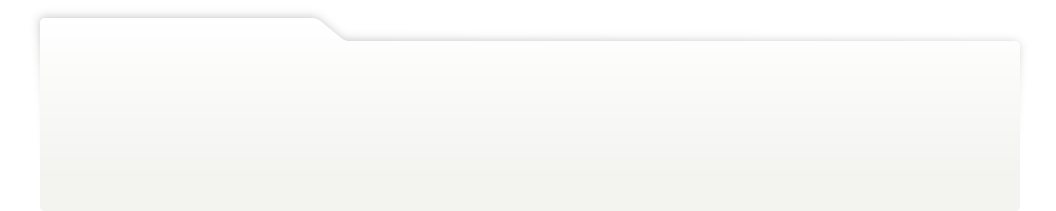
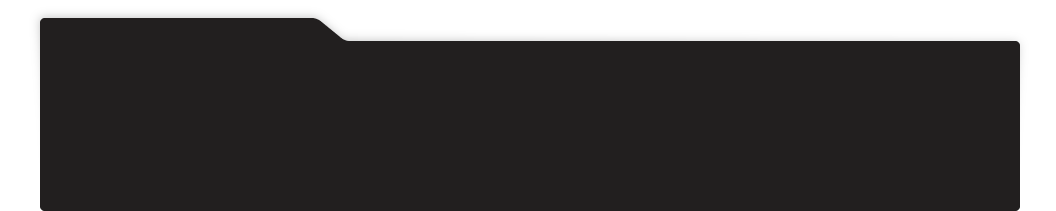
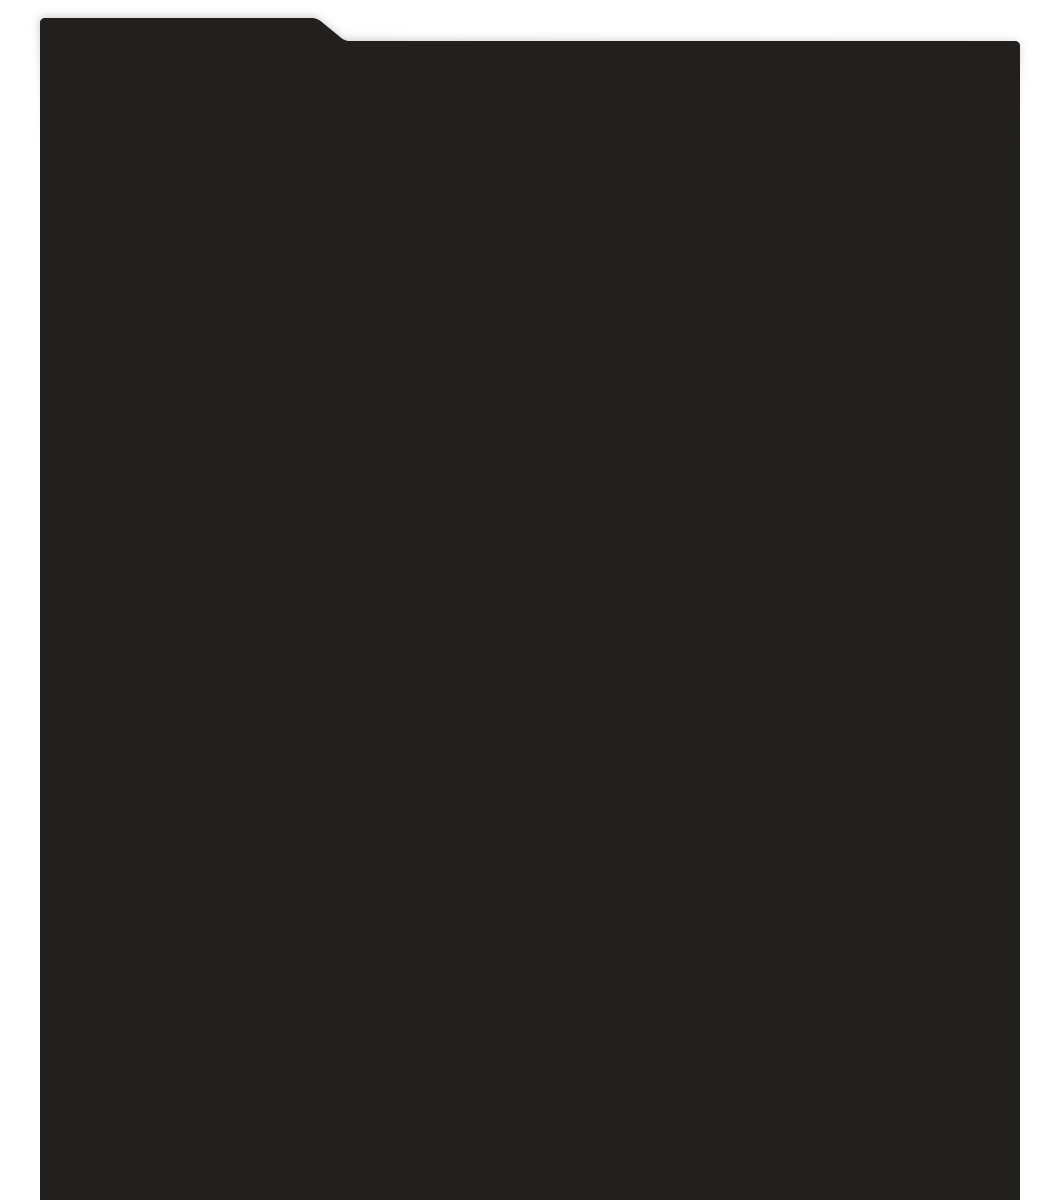
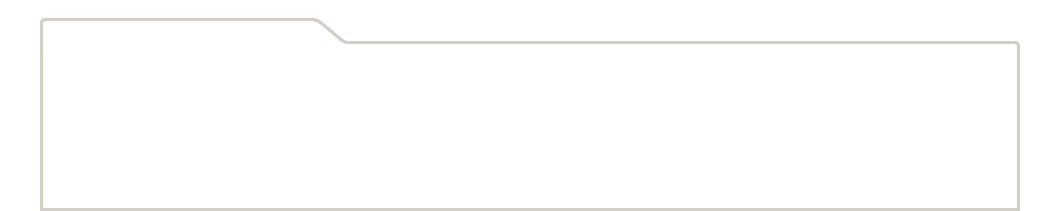
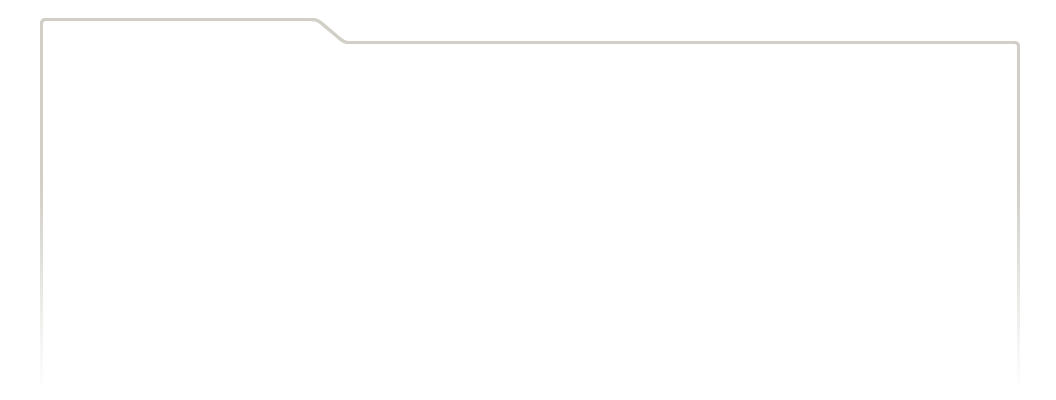
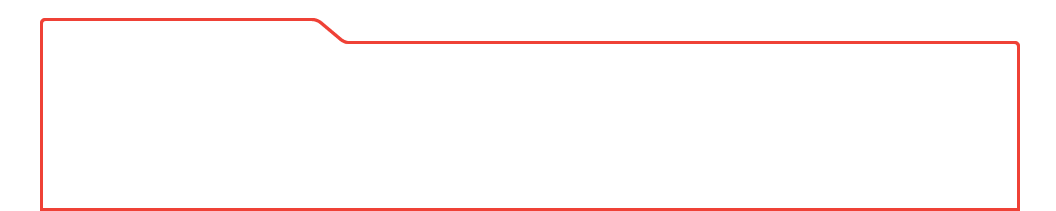
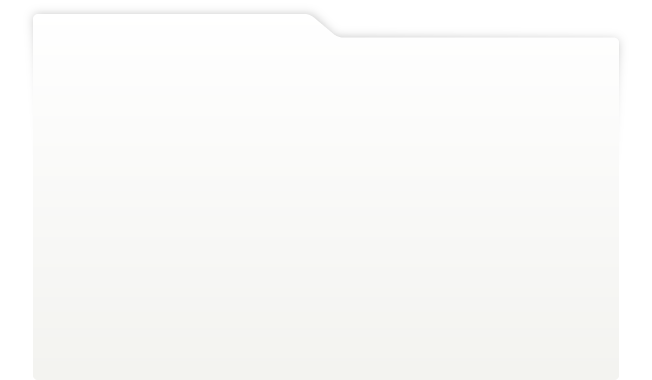
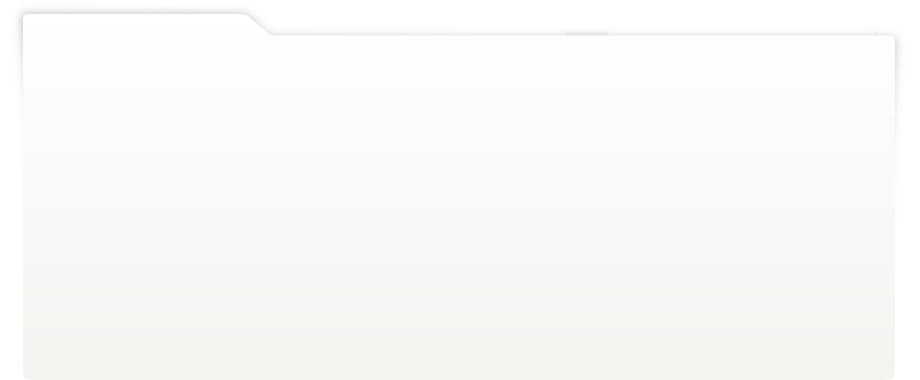
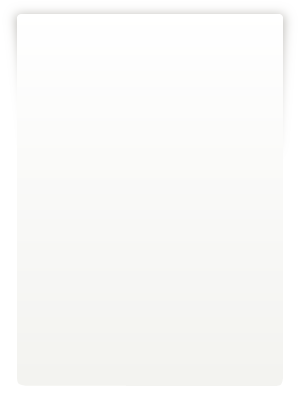
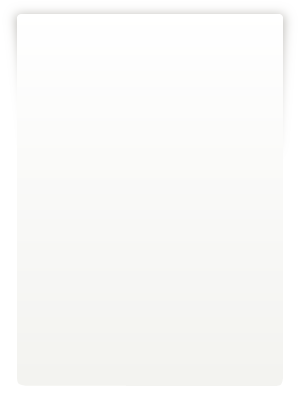
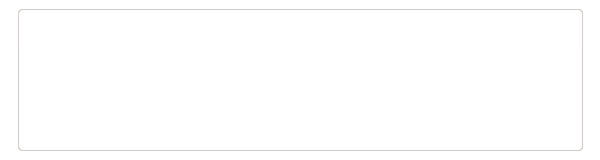
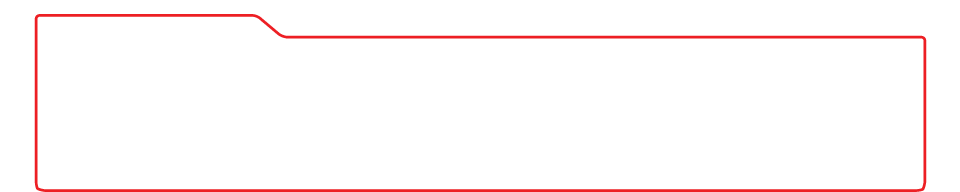
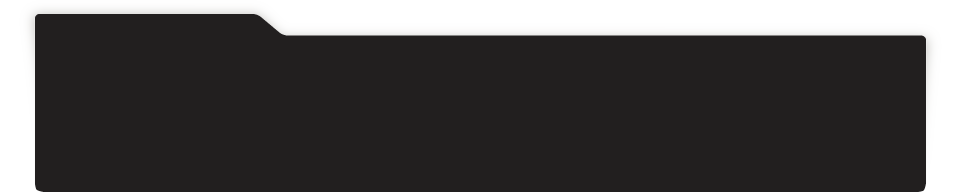
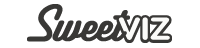
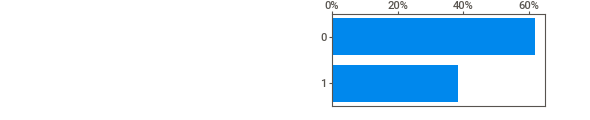
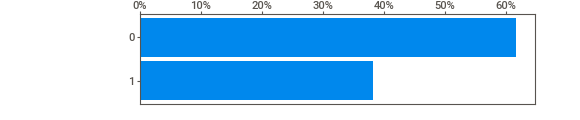
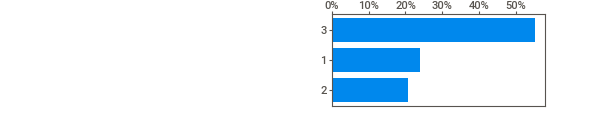
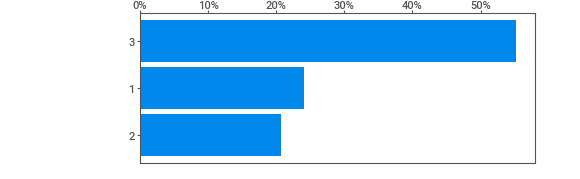
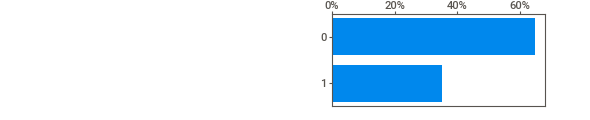
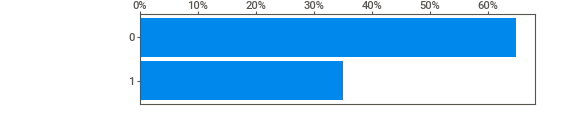
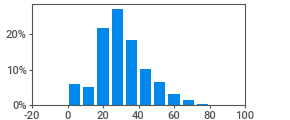
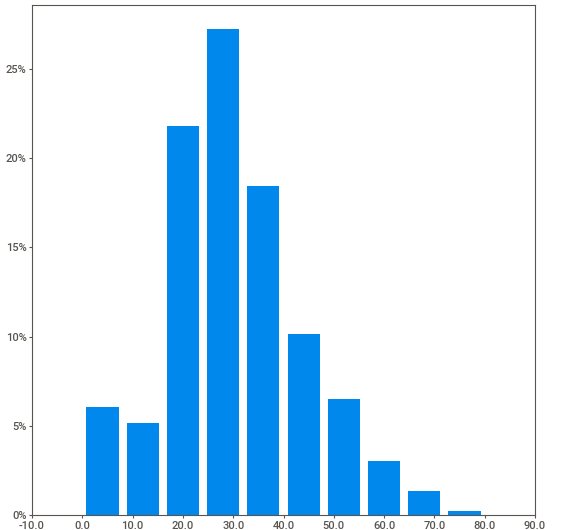
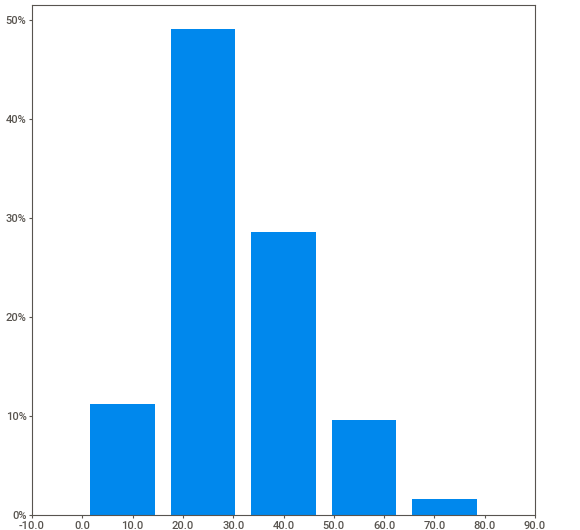
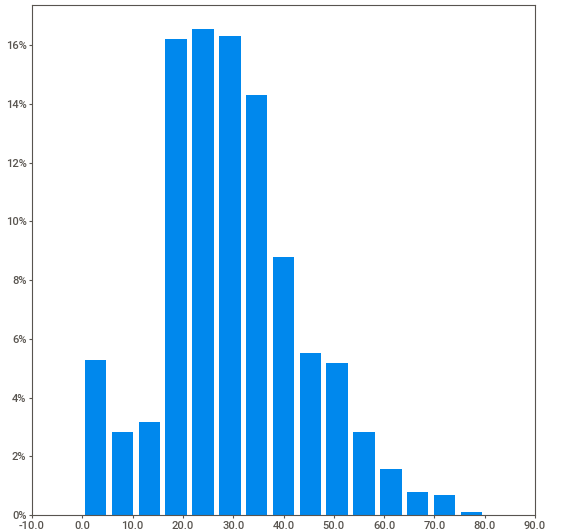
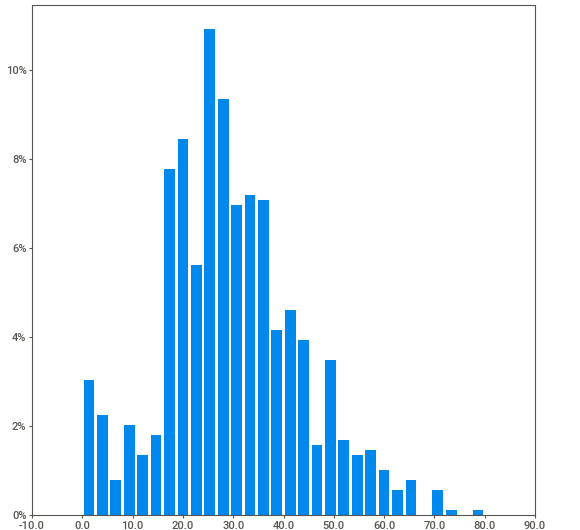
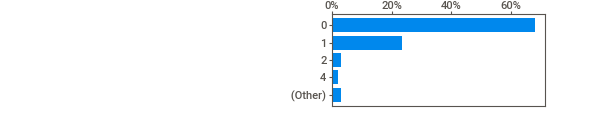
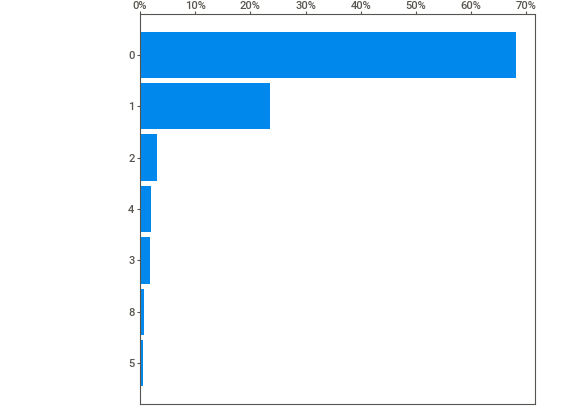
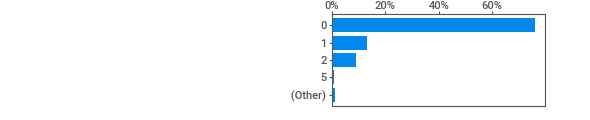
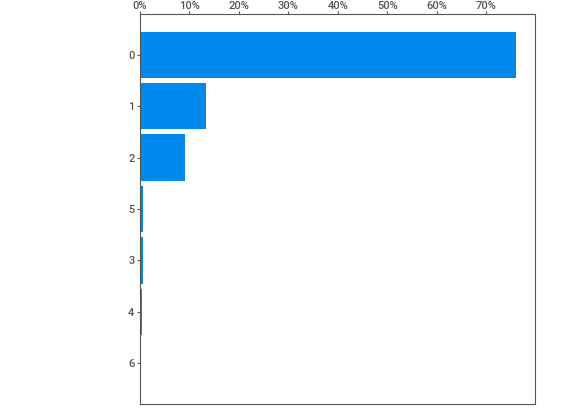
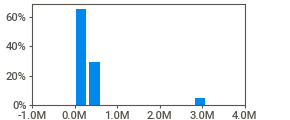
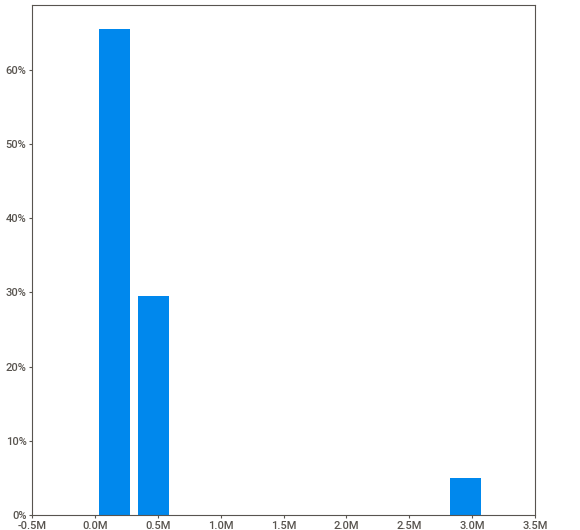
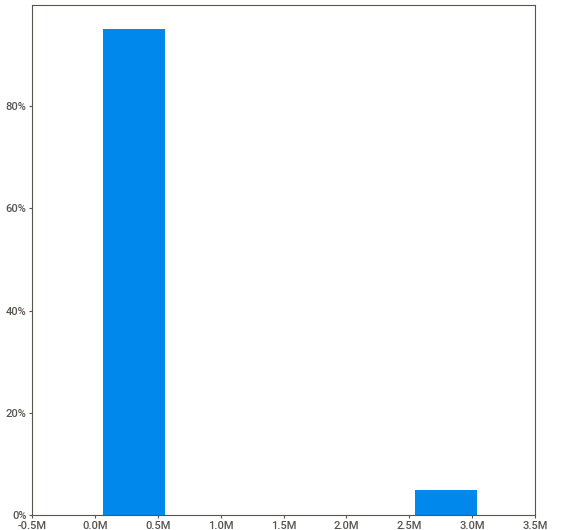
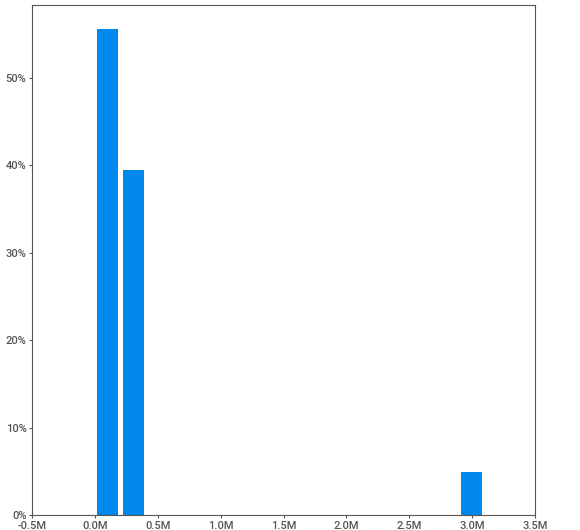
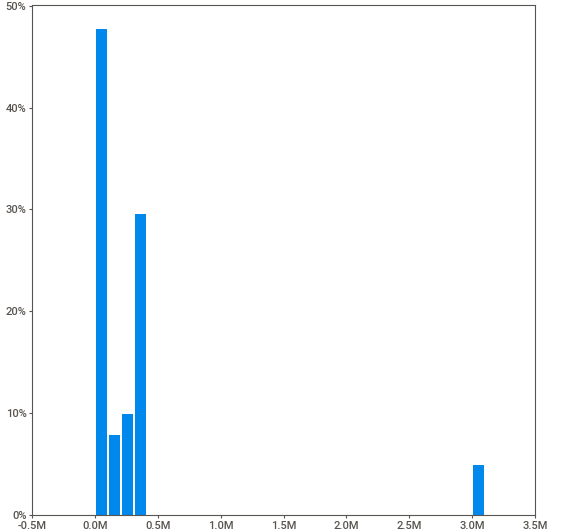
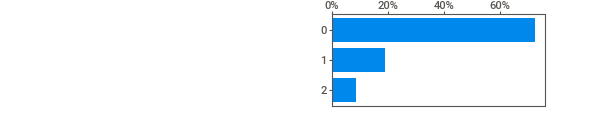
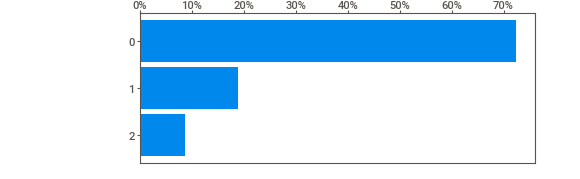
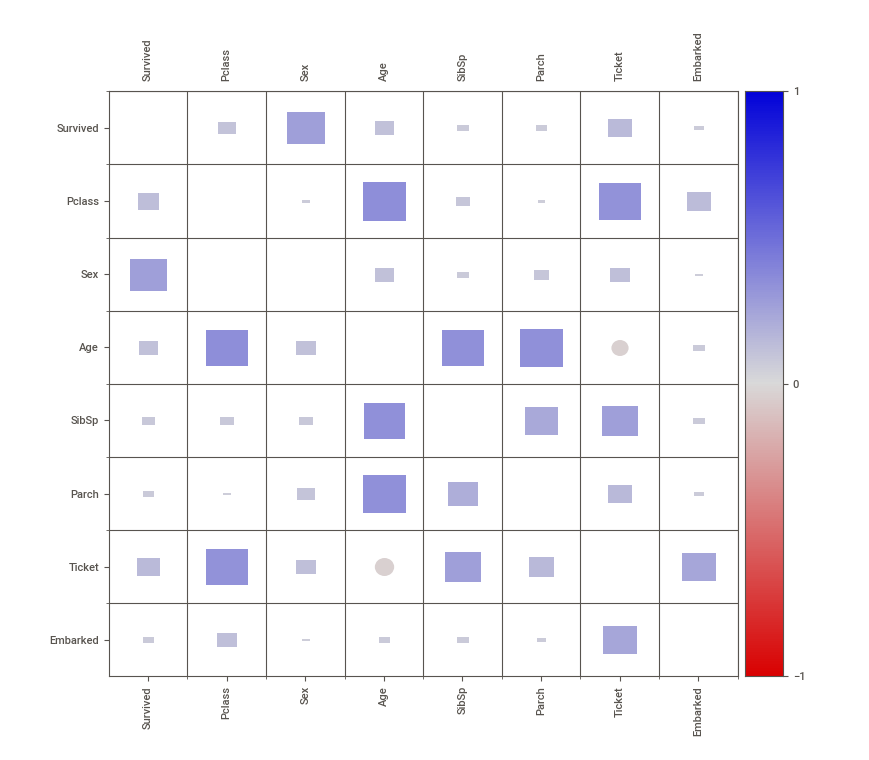
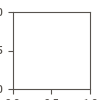

In [316]:
my_report_train.show_notebook()

In [317]:
from sklearn.tree import DecisionTreeClassifier

features = data_train.drop("Survived", axis=1).columns.tolist()
target = "Survived"

clf = DecisionTreeClassifier(criterion='entropy', splitter='random', random_state=0, max_depth = 3)

X = data_train[features].values
Y = data_train[target].values

clf.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0,
                       splitter='random')

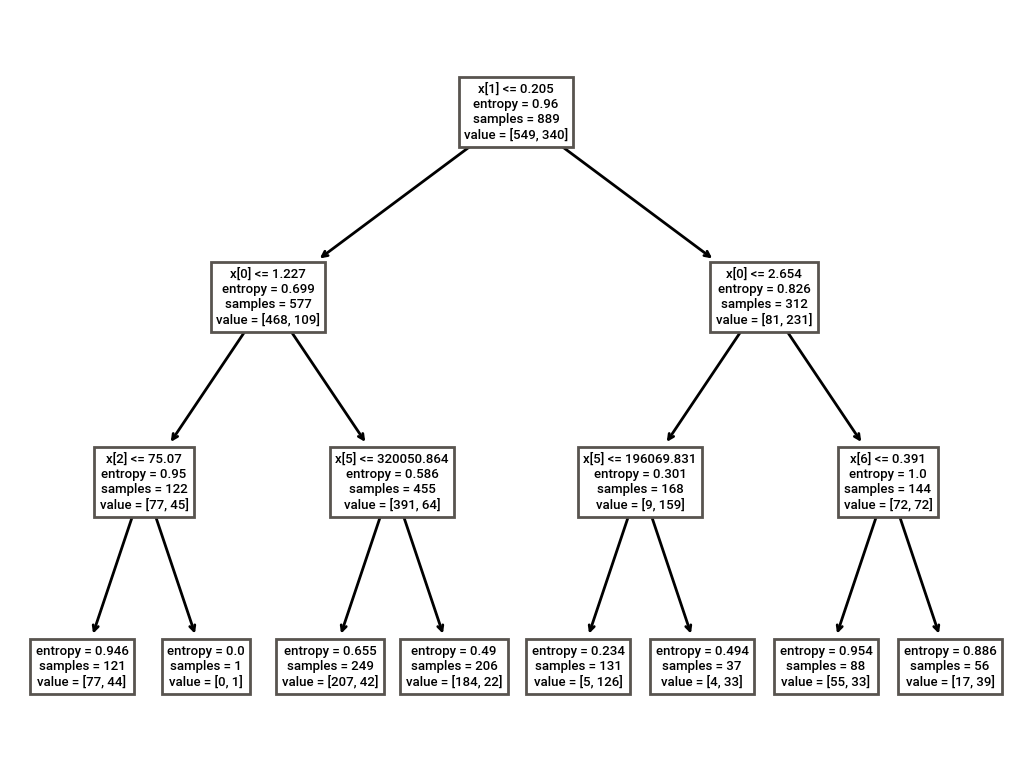

In [318]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [319]:
#https://mljar.com/blog/visualize-decision-tree/

In [320]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Embarked']


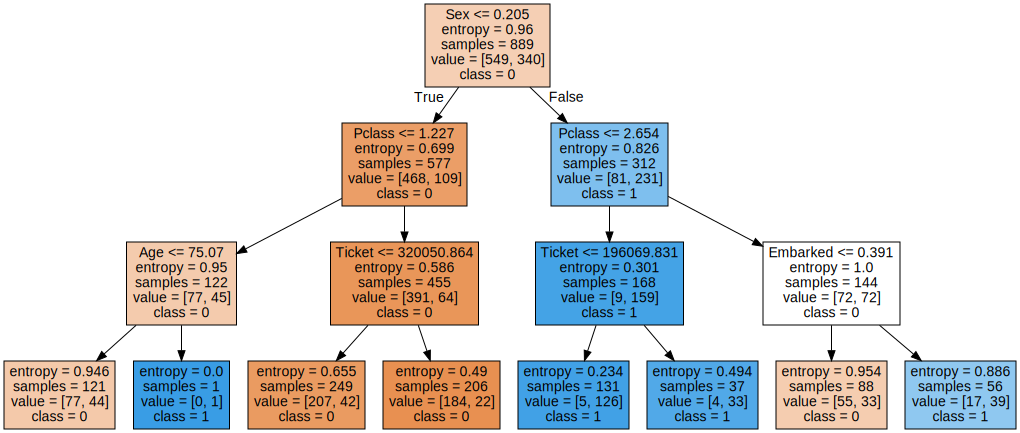

In [321]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=decisoes,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

In [322]:
X_test = data_test.values
Y_pred = clf.predict(X_test)    #make the test of the IA witch the true

In [323]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [324]:
viz_model = dtreeviz.model(clf,
                           X_train=data_train[features], y_train=data_train[target],
                           feature_names=features,
                           target_name=target, class_names=["notSurvived", "survive"])

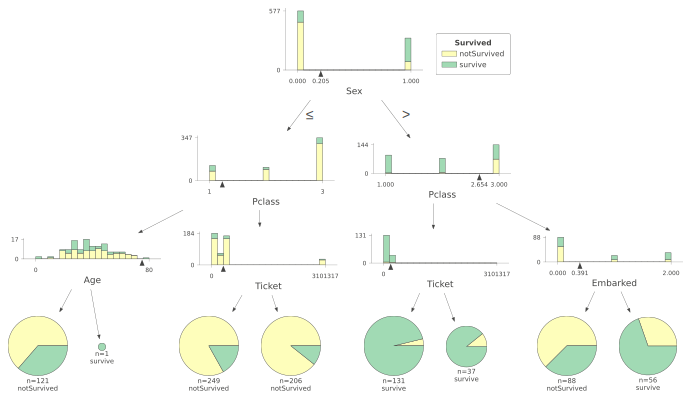

In [325]:
viz_model.view(scale=1, depth_range_to_display=(0,3))

In [350]:
a = data_test[features].iloc[100]
a

Pclass          1
Sex             1
Age            43
SibSp           1
Parch           0
Ticket      11778
Embarked        1
Name: 100, dtype: int64

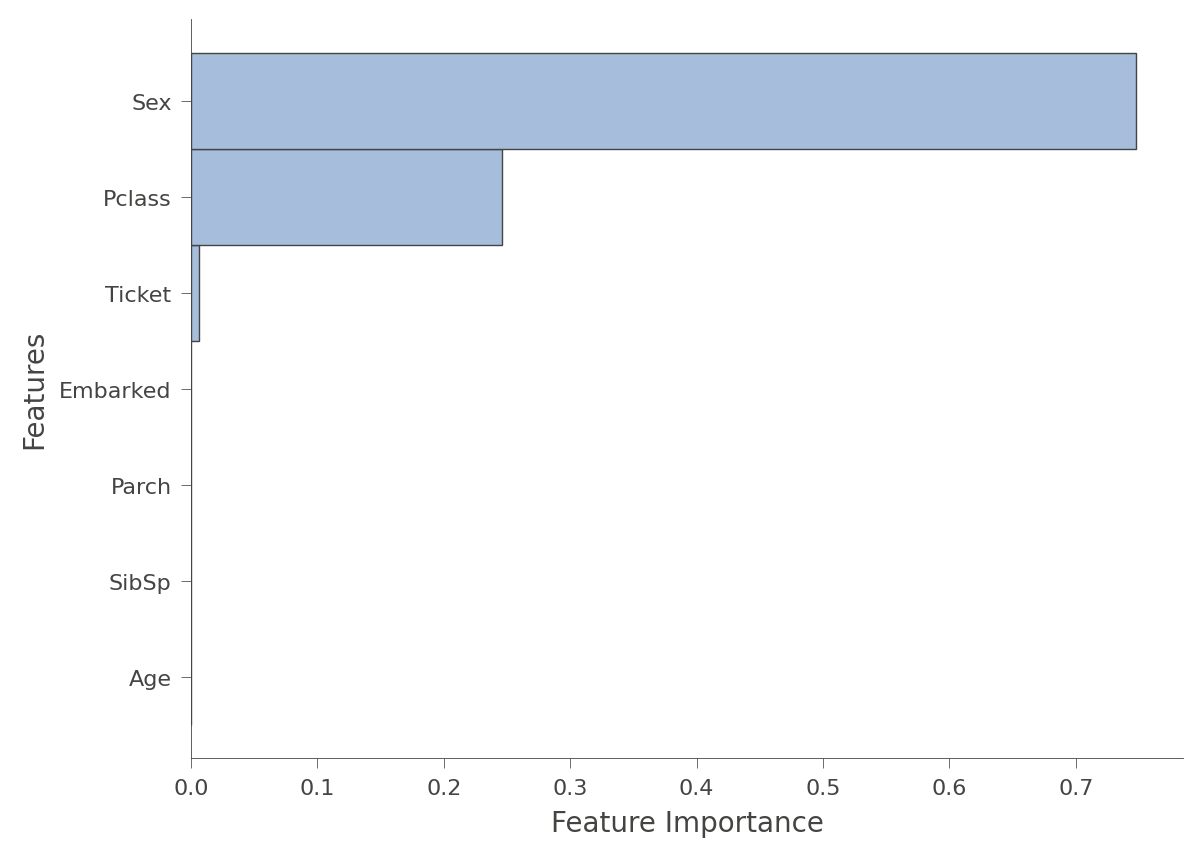

In [351]:
viz_model.instance_feature_importance(a)

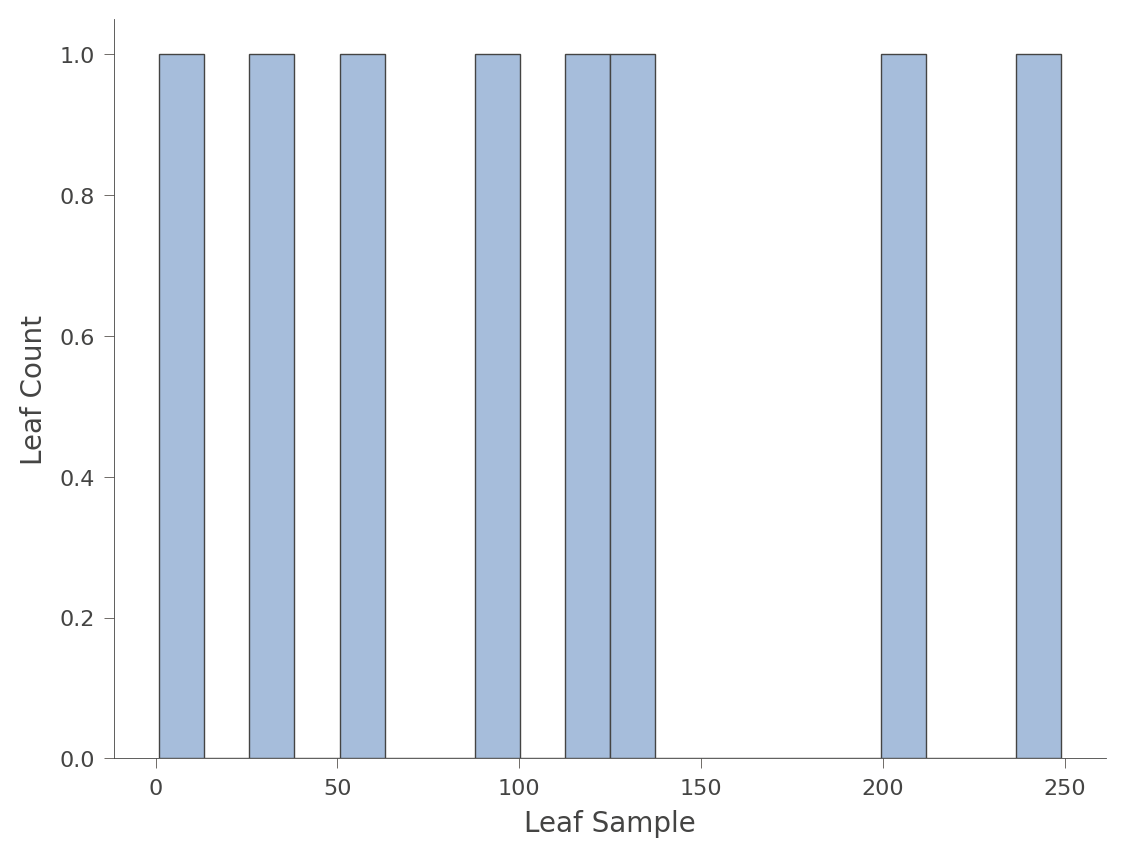

In [352]:
viz_model.leaf_sizes(display_type='hist', bins = 20)

In [353]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

0.9019138755980861

In [354]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, Y_pred)

0.8651315789473684

In [355]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Embarked'], dtype=object)

In [356]:
data_train.drop(['Survived'], axis=1).values

array([[      3,       0,      22, ...,       0,   21171,       0],
       [      1,       1,      38, ...,       0,   17599,       1],
       [      3,       1,      26, ...,       0, 3101282,       0],
       ...,
       [      3,       1,      22, ...,       2,    6607,       0],
       [      1,       0,      26, ...,       0,  111369,       1],
       [      3,       0,      32, ...,       0,  370376,       2]])

In [357]:
data_train['Survived'].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [358]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [359]:
data_gender.shape

(418, 2)